In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
housing_raw = pd.read_csv(
    'assignments/data/housing_data.csv',
    parse_dates=['period_begin', 'period_end'],
    dtype={'total_homes_sold': 'Int32', 'region_name': 'category'}
)
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [15]:
ca_housing = (housing_raw.loc[
        (housing_raw['region_name'].str.contains('CA'))
    ].assign(region_name = housing_raw['region_name'].str[0:-11])
     .set_index('period_begin').sort_index()
)
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [16]:
ca_inventory_pivot = ca_housing.pivot_table(
    index = 'period_begin',
    columns = 'region_name',
    values = 'inventory'
)

ca_inventory_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,1086.0,7.0,115.0,446.0,8.0,13.0,1156.0,598.0,1518.0,73.0,...,810.0,912.0,3.0,82.0,6.0,31.0,2.0,1461.0,234.0,9.0
2017-01-09,1109.0,7.0,116.0,448.0,7.0,12.0,1178.0,602.0,1521.0,74.0,...,822.0,909.0,3.0,82.0,6.0,30.0,2.0,1457.0,237.0,8.0
2017-01-16,1131.0,7.0,118.0,453.0,7.0,11.0,1203.0,613.0,1527.0,75.0,...,839.0,903.0,3.0,83.0,7.0,30.0,2.0,1457.0,239.0,8.0
2017-01-23,1145.0,7.0,120.0,459.0,7.0,11.0,1225.0,624.0,1535.0,76.0,...,854.0,898.0,3.0,84.0,7.0,30.0,2.0,1454.0,243.0,8.0
2017-01-30,1172.0,7.0,122.0,465.0,7.0,10.0,1258.0,638.0,1543.0,76.0,...,874.0,898.0,3.0,85.0,7.0,29.0,2.0,1456.0,247.0,8.0


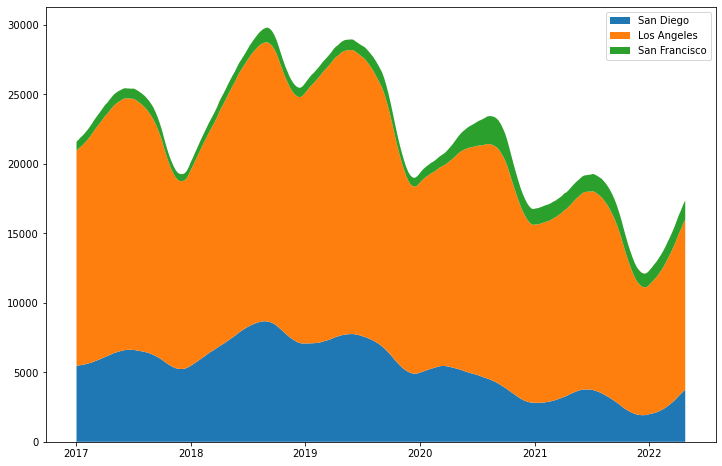

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(
    ca_inventory_pivot.index,
    ca_inventory_pivot['San Diego'],
    ca_inventory_pivot['Los Angeles'],
    ca_inventory_pivot['San Francisco'],
    labels=['San Diego', 'Los Angeles', 'San Francisco']
)

ax.legend()

plt.show()

In [17]:
sandiego_dual = (
    ca_housing.loc[ca_housing['region_name'] == 'San Diego',
                  ['inventory', 'median_active_list_price']]
)

sandiego_dual

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0
...,...,...
2022-03-28,3120.0,901649.6
2022-04-04,3291.0,902899.8
2022-04-11,3449.0,902899.8


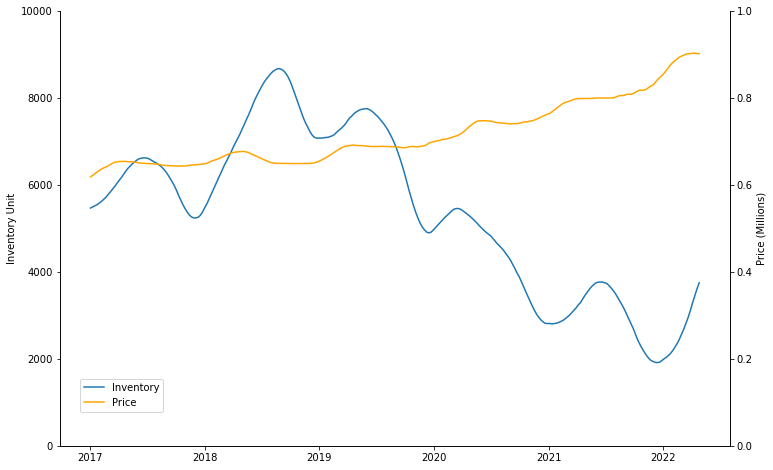

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(
    sandiego_dual.index,
    sandiego_dual['inventory'],
    label='Inventory'
)

ax.set_ylim(0, 10000)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Inventory Unit')

dual_ax = ax.twinx()
dual_ax.plot(
    sandiego_dual.index,
    sandiego_dual['median_active_list_price'] / 1000000,
    label='Price',
    color='orange'
)

dual_ax.set_ylim(0, 1.0)
dual_ax.spines['top'].set_visible(False)
dual_ax.set_ylabel('Price (Millions)')

fig.legend(bbox_to_anchor=(0.25, 0.25))
plt.show()

In [38]:
total_sold = (
    ca_housing.groupby('region_name')
    .agg({'total_homes_sold': 'sum'})
    .sort_values('total_homes_sold', ascending=False)
    .iloc[:10]
)

total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


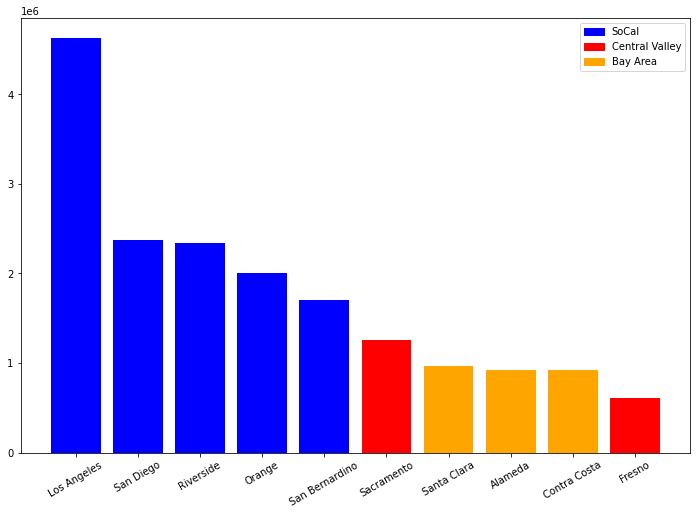

In [45]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 8))

colors = [
    'blue',
    'blue',
    'blue',
    'blue',
    'blue',
    'red',
    'orange',
    'orange',
    'orange',
    'red'
]

ax.bar(total_sold.index, total_sold['total_homes_sold'], color=colors)
ax.xaxis.set_tick_params(rotation=30)

socal = mpatches.Patch(color='blue', label='SoCal')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label='Bay Area')
plt.legend(handles=[socal, central, bay], loc='upper right')

plt.show()

In [46]:
ca_or_wa = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(['CA', 'OR', 'WA'])]
ca_or_wa

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617
...,...,...,...,...,...,...,...,...,...
622202,"Josephine County, OR",2021-06-14,2021-09-05,336,221.0,249.0,34.5,472447.6,9.279717
622226,"Linn County, OR",2020-12-21,2021-03-14,333,204.0,234.0,36.5,321820.8,9.217346
622246,"Chelan County, WA",2017-05-01,2017-07-23,242,251.0,273.0,50.6,370695.8,15.437383
622302,"San Joaquin County, CA",2017-05-22,2017-08-13,2095,1282.0,1479.0,34.9,354895.7,8.692168


In [49]:
ca_or_wa = ca_or_wa.assign(
    price_range = pd.cut(
        ca_or_wa.loc[:, 'median_active_list_price'],
        [0, 400000, 600000, 2000000],
        labels=['0-400k', '400k-600k', '600k+']
    ),
    state = ca_or_wa['region_name'].str[-2:]
)


In [102]:
ca_or_wa_pivot = ca_or_wa.query("period_end == '2021-08-01'").pivot_table(
    index='price_range',
    columns='state',
    values='inventory',
    aggfunc='sum'
)

In [103]:
ca_or_wa_pivot

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


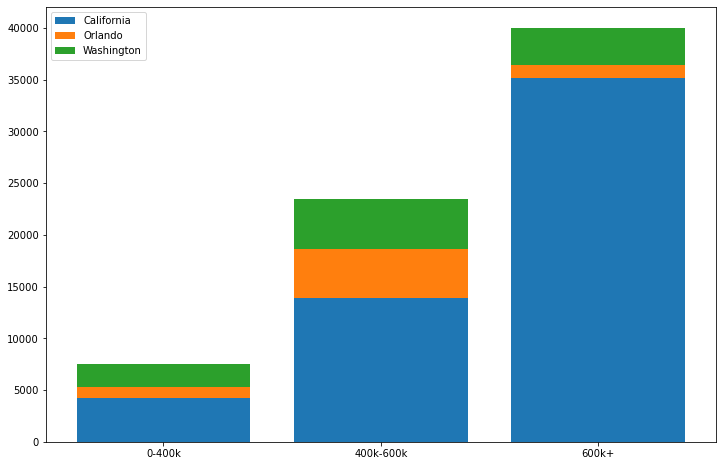

In [107]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(
    ca_or_wa_pivot.index,
    ca_or_wa_pivot['CA'],
    label='California'
)

ax.bar(
    ca_or_wa_pivot.index,
    ca_or_wa_pivot['OR'],
    label='Orlando',
    bottom=ca_or_wa_pivot['CA']
)

ax.bar(
    ca_or_wa_pivot.index,
    ca_or_wa_pivot['WA'],
    label='Washington',
    bottom=ca_or_wa_pivot['CA']+ca_or_wa_pivot['OR']
)

ax.legend()
plt.show()

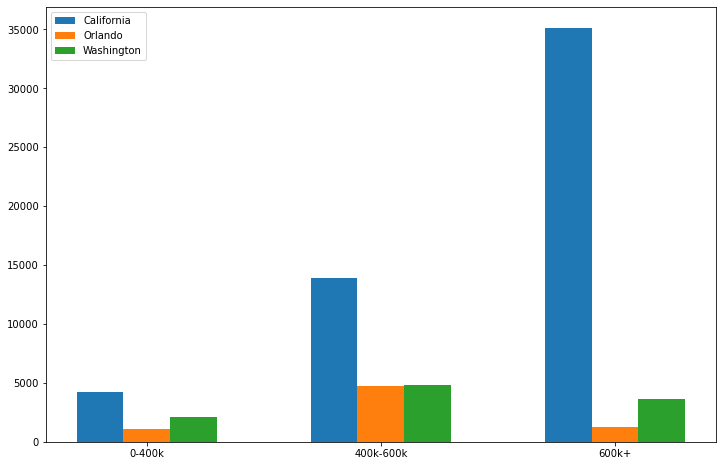

In [108]:
import numpy as np

fig, ax = plt.subplots(figsize=(12,8))

width=0.2
x = np.arange(3)

ax.bar(
    x-width,
    ca_or_wa_pivot['CA'],
    label='California',
    width=width
)

ax.bar(
    x,
    ca_or_wa_pivot['OR'],
    label='Orlando',
    width=width
)

ax.bar(
    x+width,
    ca_or_wa_pivot['WA'],
    label='Washington',
    width=width
)

ax.set_xticks(x)
ax.set_xticklabels(ca_or_wa_pivot.index)

ax.legend(loc='upper left')
plt.show()

In [109]:
pie_sales = (
    ca_housing.loc[ca_housing['region_name'].isin(['San Francisco', 'Los Angeles', 'San Diego'])]
    .groupby('region_name')
    .agg({'total_homes_sold': 'sum'})
)

pie_sales

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


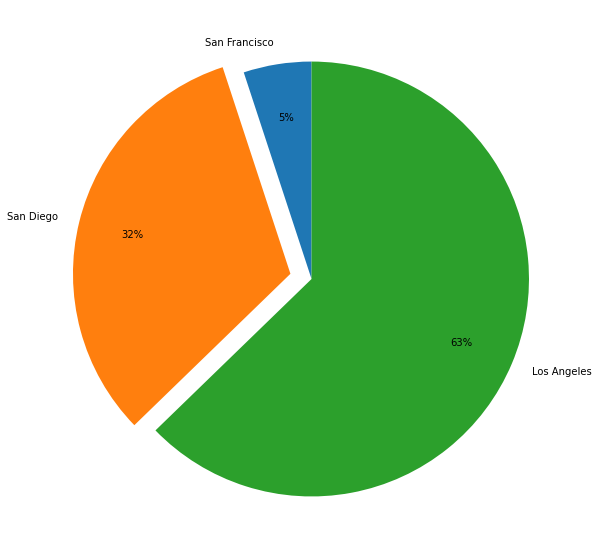

In [118]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    x=pie_sales['total_homes_sold'].iloc[::-1],
    startangle=90,
    labels=pie_sales.index[::-1],
    autopct='%.0f%%',
    pctdistance=0.75,
    explode=[0, .1, 0]
)
plt.show()

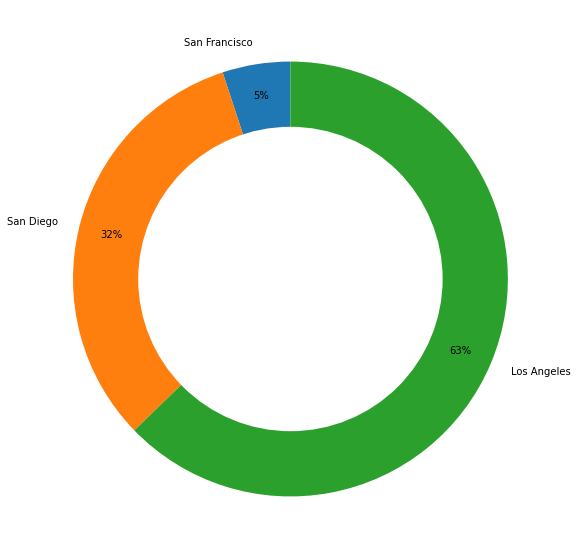

In [124]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    x=pie_sales['total_homes_sold'].iloc[::-1],
    startangle=90,
    labels=pie_sales.index[::-1],
    autopct='%.0f%%',
    pctdistance=0.85,
    explode=[0, 0, 0]
)

hole = plt.Circle((0, 0), 0.7, fc='white')
ffig = plt.gcf()
ffig.gca().add_artist(hole)

plt.show()

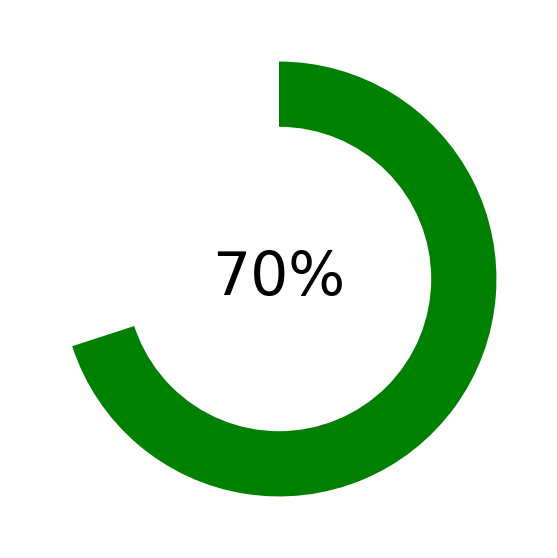

In [135]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    [.3, .7],
    startangle=90,
    labels=['', ''],
    colors=['white', 'green']
)

hole = plt.Circle((0, 0), .7, fc='white')
plt.gcf().gca().add_artist(hole)

plt.text(0, 0,
        '70%',
         ha='center',
         va='center',
         fontsize=60
        )

plt.show()

In [136]:
la_housing = ca_housing.loc[ca_housing['region_name'] == 'Los Angeles']
la_housing

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Los Angeles,2017-03-26,14200,15492.0,17049.0,58.7,611561.0,14.631975
2017-01-09,Los Angeles,2017-04-02,15043,15605.0,17233.0,55.8,614061.0,14.082804
2017-01-16,Los Angeles,2017-04-09,15216,15724.0,17381.0,53.1,617311.0,14.037622
2017-01-23,Los Angeles,2017-04-16,15603,15834.0,17518.0,50.5,620644.3,13.770815
2017-01-30,Los Angeles,2017-04-23,15936,15972.0,17683.0,48.0,624541.6,13.605017
...,...,...,...,...,...,...,...,...
2022-03-28,Los Angeles,2022-06-19,17301,11415.0,12993.0,28.8,906783.0,9.074223
2022-04-04,Los Angeles,2022-06-26,16994,11647.0,13223.0,29.1,906783.1,9.412136
2022-04-11,Los Angeles,2022-07-03,17017,11830.0,13415.0,29.5,906782.4,9.530504


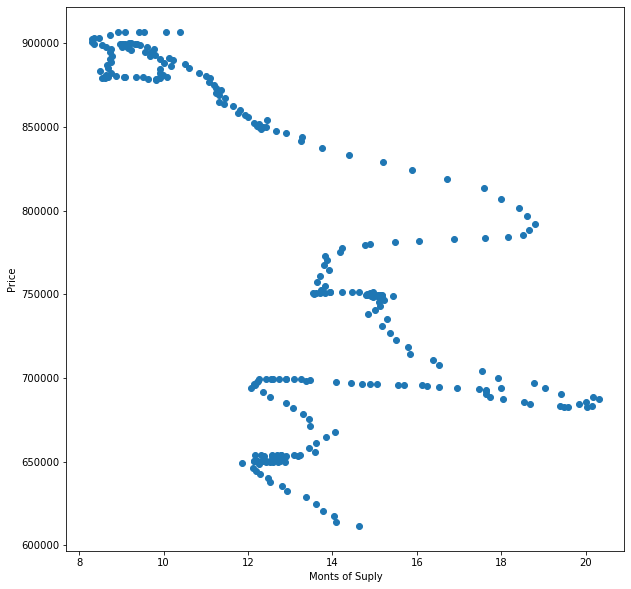

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(la_housing['months_of_supply'],
           la_housing['median_active_list_price']
          )

ax.set_xlabel('Monts of Suply')
ax.set_ylabel('Price')

plt.show()

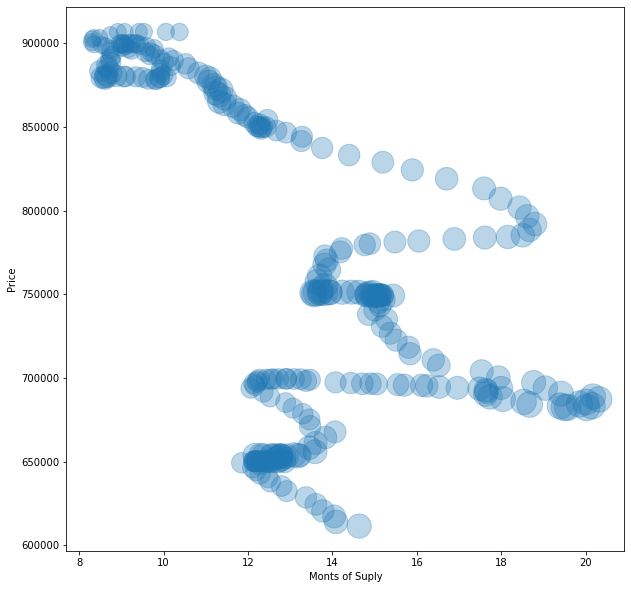

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(la_housing['months_of_supply'],
           la_housing['median_active_list_price'],
           s= (la_housing['age_of_inventory'] * 10),
           alpha=.3
          )

ax.set_xlabel('Monts of Suply')
ax.set_ylabel('Price')

plt.show()

In [151]:
diamonds = (pd.read_csv('./assignments/data/Diamonds Prices2022.csv')).drop(['Unnamed: 0'], axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


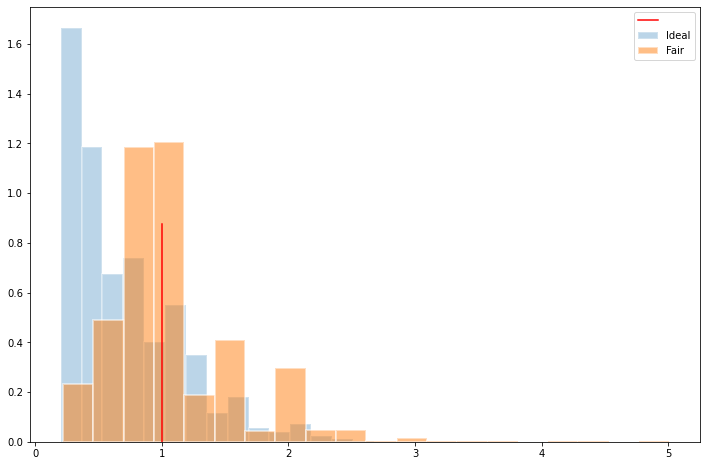

In [172]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.axvline(x=1, ymin=0, ymax=.5, c='red')

ax.hist(diamonds.loc[diamonds['cut'] == 'Ideal', ['carat']],
        bins=20, density=True,
        edgecolor='white', linewidth=2,
       alpha=.3)
ax.hist(diamonds.loc[diamonds['cut'] == 'Fair', ['carat']],
        bins=20, density=True,
        edgecolor='white', linewidth=2,
       alpha=.5)

ax.legend(['', 'Ideal', 'Fair'])

plt.show()